# Comment mettre en oeuvre une régression linéaire avec python ?

##### Germain Salvato-Vallverdu [germain.vallverdu@univ-pau.fr](mailto:germain.vallverdu@univ-pau.fr)

L'objectif de ce TP est de mettre en pratique le langage python pour réaliser une regression linéaire. L'idée est, dans un premier temps, de reprendre les éléments de base du langage (condition, boucles ...) pour créer un outil qui calcule les paramètres par la méthode des moindres carrés. Dans une deuxième partie les modules spécifiques tels que [numpy](http://www.numpy.org/) ou [matplotlib](http://matplotlib.org/) seront mis à profit pour réaliser la même opération avec des méthodes existantes.

*Note : Ce notebook est compatible python2 et python3. Il est recommandé d'utiliser python3.*

### Sommaire

 1. [Introduction](#Introduction)
     1. [Cahier des charges](#Cahier-des-charges)
     2. [Rappels mathématiques](#Rappels-mathématiques)
     3. [Progression](#Progression)
 2. [Programation](#Programmation)
     1. [Étape 0: Lecture du fichier de données](#Étape-0:-Lecture-du-fichier-donnees.dat)
     2. [Étape 1: À la main](#Étape-1:-À-la-main)
     3. [Étape 2: Créer une fonction](#Étape-2:-Créer-une-fonction)
     4. [Étape 3: Utilisation du module numpy](#Étape-3:-Utilisation-du-module-numpy)
     5. [Étape 4: Utilisation des méthodes prédéfinies dans numpy et scipy](#Étape-4:-Utilisation-des-méthodes-prédéfinies-dans-numpy-et-scipy)
 3. [Représentation graphique](#Représentation-graphique)
 4. [Pour aller plus loin ; les résidus](#Pour-aller-plus-loin-:-les-résidus)
 5. [Conlusion](#Conclusion)

## Introduction

### Cahier des charges

Le programme que nous allons écrire devra réaliser les opérations suivantes :

* Lire les valeurs des valeurs de $x$ et $y$ sur le fichier `donnees.dat`.
* Calculer les paramètres $a$ et $b$ de la régression linéaire par la méthode des moindres carrés et les afficher.
* (bonus) Représenter les points $(x,y)$ et tracer la droite de régression.

### Rappels mathématiques

La régression linéaire consiste à chercher les paramètres $a$ et $b$ définissant la droite $y=ax+b$ qui passe au plus près d'un ensemble de points $(x_k,y_k)$. Les paramètres $a$ et $b$ sont déterminés par la méthodes des moindres carrés qui consiste, dans le cas d'une régression linéaire, à minimiser la quantité :

\begin{equation}
    Q(a, b) = \sum_{k=1}^N (y_k - a x_k - b)^2
\end{equation}

Le minimum de $Q(a,b)$ est obtenu lorsque ses dérivées par rapport à $a$ et $b$ sont nulles. Il faut donc résoudre le système à deux équations deux inconnues suivant :

\begin{align}
    &
    \begin{cases}
        \displaystyle\frac{\partial Q(a,b)}{\partial a} = 0 \\ 
        \displaystyle\frac{\partial Q(a,b)}{\partial b} = 0
    \end{cases}
    &
    \Leftrightarrow &
    &
    &
    \begin{cases}
        \displaystyle -2 \sum_{k=1}^N x_k \left(y_k - a x_k - b\right) = 0 \\ 
        \displaystyle -2 \sum_{k=1}^N \left(y_k - a x_k - b\right) = 0
    \end{cases}
\end{align}

Les solutions de ce système sont :

\begin{align}
    a & = \frac{\displaystyle N \sum_{k=1}^N x_k y_k - \sum_{k=1}^N x_k\sum_{k=1}^N y_k}{\displaystyle N\sum_{k=1}^N x_k^2 - \left(\sum_{k=1}^N x_k\right)^2} &
    b & = \frac{\displaystyle \sum_{k=1}^N x_k^2 \sum_{k=1}^N y_k - \sum_{k=1}^N x_k\sum_{k=1}^N x_k y_k}{\displaystyle N\sum_{k=1}^N x_k^2 - \left(\sum_{k=1}^N x_k\right)^2}
\end{align}

### Progression

Le programme sera écrit de plusieurs façon différentes.

1. Tous les calculs seront réalisés à la main.
2. Création d'une fonction qui réalise la régression linéaire
3. Utilisation du module numpy pour simplifier les calculs
4. Utilisation des méthodes des modules numpy/scipy pour réaliser la régression linéaire
5. (bonus) Utilisation du module matplotlib pour représenter les points et la droite de régression.

## Programmation

### Étape 0: Lecture du fichier `donnees.dat`

Contenu du fichier `donnees.dat`

In [1]:
cat data/donnees.dat

1. 2.1
2. 2.9
3. 4.2
4. 5.05
5. 5.85
6. 6.95
7. 8.1
8. 9.
9. 10.2
10. 10.9


Lecture du fichier ligne par ligne :

In [2]:
with open("data/donnees.dat", "r") as inp:
    for line in inp:
        xi, yi = line.split()
        print(xi, yi)
print("type de xi : ", type(xi))

1. 2.1
2. 2.9
3. 4.2
4. 5.05
5. 5.85
6. 6.95
7. 8.1
8. 9.
9. 10.2
10. 10.9
type de xi :  <class 'str'>


On va maintenant enregistrer les valeurs xi et yi dans des listes. Par ailleurs, on peut remarquer que les valeurs sont lues comme des chaînes de caractères. Il faut les convertir en nombre flottants avec la fonction `float()`.

In [3]:
# création des listes
x = list()
y = list()

# lecture du fichier
with open("data/donnees.dat", "r") as inp:
    for line in inp:
        xi, yi = line.split()
        x.append(float(xi))
        y.append(float(yi))

Nous avons maintenant nos listes de valeurs de x et y :

In [4]:
print(x)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [5]:
print(y)

[2.1, 2.9, 4.2, 5.05, 5.85, 6.95, 8.1, 9.0, 10.2, 10.9]


Nous verrons par la suite comment lire ce type de fichier de façon efficace avec la méthode `loadtxt()` de `numpy`.

### Étape 1: À la main

Dans cette étape on va utiliser directement les formules présentées en introduction pour calculer la valeur des paramètres $a$ et $b$. Commençons par calculer la somme des valeurs de $x$. Le point important est de ne pas oublier d'initialiser la valeur de la somme.

In [6]:
# initialisation
x_sum = 0
# calcul de la somme
for xi in x:
    x_sum += xi
# affichage
print("somme des valeurs de x = ", x_sum)

somme des valeurs de x =  55.0


On fait de même pour la somme des valeurs de $y$ et des valeurs de $x$ au carré.

In [7]:
y_sum = 0.
for yi in y:
    y_sum += yi
print("somme des valeurs de y = ", y_sum)

somme des valeurs de y =  65.25


In [8]:
x2_sum = 0.
for xi in x:
    x2_sum += xi**2
print("somme des valeurs de x^2 = ", x2_sum)

somme des valeurs de x^2 =  385.0


Il reste à calculer la somme des produits $x\times y$. Pour parcourir à la fois la liste des valeurs de $x$ et de $y$ on utilise la fonction `zip` qui joint les deux listes :

In [9]:
for xi, yi in zip(x, y):
    print("xi = ", xi, "\tyi = ", yi)

xi =  1.0 	yi =  2.1
xi =  2.0 	yi =  2.9
xi =  3.0 	yi =  4.2
xi =  4.0 	yi =  5.05
xi =  5.0 	yi =  5.85
xi =  6.0 	yi =  6.95
xi =  7.0 	yi =  8.1
xi =  8.0 	yi =  9.0
xi =  9.0 	yi =  10.2
xi =  10.0 	yi =  10.9


Mettons cela à profit pour calculer la somme :

In [10]:
xy_sum = 0.
for xi, yi in zip(x, y):
    xy_sum += xi * yi
print("somme des valeurs de x*y = ", xy_sum)

somme des valeurs de x*y =  441.15


Maintenant que nous disposons de toutes les valeurs nécessaires, il ne reste plus qu'à calculer $a$ et $b$. Nous avons encore besoin du nombre de points. La fonction `len` donne le nombre d'éléments d'une liste.

In [11]:
npoints = len(x)
print("Nombre de points = ", npoints)

Nombre de points =  10


D'après les équations présentées en introduction :

In [12]:
a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
print("a = ", a)

a =  0.9972727272727273


In [13]:
b = (x2_sum * y_sum - x_sum * xy_sum) / (npoints * x2_sum - x_sum**2)
print("b = ", b)

b =  1.04


### Étape 2: Créer une fonction

Dans cette fonction nous allons regrouper les différentes étapes permettant de réaliser la régression linéaire. La fonction prend comme arguments les listes des valeurs de $x$ et $y$ et retourne les valeurs des paramètres $a$ et $b$. Les entrées et sorties de la fonction doivent être explicités dans la `docstring` située en dessous de la définition.

In [14]:
def regLin(x, y):
    """ 
    Ajuste une droite d'équation a*x + b sur les points (x, y) par la méthode
    des moindres carrés.
    
    Args :
        * x (list): valeurs de x
        * y (list): valeurs de y
        
    Return:
        * a (float): pente de la droite
        * b (float): ordonnée à l'origine
    """
    # initialisation des sommes
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    # calcul des sommes 
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
    # nombre de points
    npoints = len(x)
    # calcul des parametres
    a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
    b = (x2_sum * y_sum - x_sum * xy_sum) / (npoints * x2_sum - x_sum**2)
    # renvoie des parametres
    return a, b

Utilisons maintenant cette nouvelle fonction.

In [15]:
a, b = regLin(x, y)
print("a = ", a)
print("b = ", b)

a =  0.9972727272727273
b =  1.04


Pour afficher les nombres flotant, il est possible d'utiliser un format. Deux syntaxes existent suivant la version de python :

In [16]:
# python 2.7 et superieur
print("a = {:8.3f}".format(a))
print("b = {:8.3f}".format(b))

a =    0.997
b =    1.040


In [17]:
# python 2.X
print("a = %8.3f" % a)
print("b = %8.3f" % b)

a =    0.997
b =    1.040


### Étape 3: Utilisation du module numpy

Nous allons maintenant utiliser le module numpy pour simplifier le calcul des sommes. Pour commencer il faut importer le module numpy. Il est courant de le donner `np` comme raccourci.

In [18]:
import numpy as np

La somme des valeurs d'un tableau peut être obtenue par la méthode `sum()`.

In [19]:
a = np.array([1, 2, 3])
a.sum()

6

La somme des carrés ou des produits peut également être obtenue aisément.

In [20]:
(a**2).sum()

14

Pour calculer les produits entre deux arrays numpy il suffit de les multiplier :

In [21]:
b = np.array([3, 2, 1])
print("a : ", a)
print("b : ", b)
print("a * b :", a * b)

a :  [1 2 3]
b :  [3 2 1]
a * b : [3 4 3]


La somme se calcule alors de la même manière que précédemment pour le carré :

In [22]:
(a * b).sum()

10

Nous pouvons maintenant simplifier la fonction `regLin` en utilisant les fonctions de `numpy` :

In [23]:
def regLin_np(x, y):
    """ 
    Ajuste une droite d'équation a*x + b sur les points (x, y) par la méthode
    des moindres carrés.
    
    Args :
        * x (list): valeurs de x
        * y (list): valeurs de y
        
    Return:
        * a (float): pente de la droite
        * b (float): ordonnée à l'origine
    """
    # conversion en array numpy
    x = np.array(x)
    y = np.array(y)
    # nombre de points
    npoints = len(x)
    # calculs des parametres a et b
    a = (npoints * (x*y).sum() - x.sum()*y.sum()) / (npoints*(x**2).sum() - (x.sum())**2)
    b = ((x**2).sum()*y.sum() - x.sum() * (x*y).sum()) / (npoints * (x**2).sum() - (x.sum())**2)
    # renvoie des parametres
    return a, b

La nouvelle fonction renvoie évidemment les mêmes résultats :

In [24]:
a, b = regLin_np(x, y)
print("a = {:8.3f}\nb = {:8.3f}".format(a, b)) # \n est le caractere de fin de ligne

a =    0.997
b =    1.040


### Étape 4: Utilisation des méthodes prédéfinies dans numpy et scipy

Numpy et Scipy sont deux modules scientifiques de python qui regroupent de nombreuses fonctions. Nous allons utiliser la méthode [loadtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) pour lire le fichier texte et les méthodes [polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) et [linregress](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) pour réaliser la régression linéaire. Le module numpy est totalement inclu dans scipy. Compte tenu du grand nombre de modules et bibliothèques python existants, il est important de savoir lire une documentation pour utiliser les méthodes disponibles. De plus, l'utilisation d'une méthode déjà existante accélère le travail de développement tout en évitant de refaire la même chose. Pour obtenir la documentation à l'intérieur de ipyhon, ajouter un ? après le nom de la méthode.

Commençons par lire le fichier `donnees.dat` avec la méthode `loadtxt` pour lire le fichier de données.

In [25]:
data = np.loadtxt("data/donnees.dat")
print(data)

[[  1.     2.1 ]
 [  2.     2.9 ]
 [  3.     4.2 ]
 [  4.     5.05]
 [  5.     5.85]
 [  6.     6.95]
 [  7.     8.1 ]
 [  8.     9.  ]
 [  9.    10.2 ]
 [ 10.    10.9 ]]


Les valeurs de $x$ correspondent à la première colonne.

In [26]:
x = data[:,0]
print(x)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


Les valeurs de $y$ correspondent à la deuxième colonne.

In [27]:
y = data[:,1]
print(y)

[  2.1    2.9    4.2    5.05   5.85   6.95   8.1    9.    10.2   10.9 ]


Le tout peut être fait en une seul ligne :

In [28]:
x, y = np.loadtxt("data/donnees.dat", unpack=True)
print(x)
print(y)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[  2.1    2.9    4.2    5.05   5.85   6.95   8.1    9.    10.2   10.9 ]


#### Utilisation de la méthode `polyfit`

La méthode `polytfit` du module `numpy` prend comme argument les valeurs de $x$, de $y$ et le degré du polynome (1 ici puisqu'il s'agit d'une droite).

In [29]:
parametres = np.polyfit(x, y, 1)
print(parametres)

[ 0.99727273  1.04      ]


Les paramètres sont bien les mêmes que ceux que nous avions déterminés à la main.

In [30]:
a, b = parametres
print("a = {:8.3f}\nb = {:8.3f}".format(a, b))

a =    0.997
b =    1.040


#### Utilisation de la méthode `linregress`

La méthode `linregress` est contenue dans le module `stats` du module `scipy`. Elle prend comme argument les valeurs de $x$, de $y$ et retourne en plus des paramètres $a$ et $b$, le coefficiant de corrélation.

Commençons par importer la méthode `linregress`.

In [31]:
from scipy.stats import linregress

Utilisons maintenant la méthode `linregress`.

In [32]:
a, b, r, p_value, std_err = linregress(x, y)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a, b, r**2))

a   =   0.997
b   =   1.040
r^2 = 0.99829


## Représentation graphique

Python offre la possibilité de réaliser une réprésentation graphique en utilisant le module [matplotlib](http://matplotlib.org/). Voici un exemple d'utilisation de ce module pour représenter les points $(x, y)$ et la droite de régression précédemment déterminée.

Pour une utilisation dans ipython il faut d'abord préparer l'environnement pour intégrer matplotlib.

In [33]:
%matplotlib inline

Chargeons le module ``matplotlib.``

In [34]:
import matplotlib.pyplot as plt

Préparons maintenant le graphique.

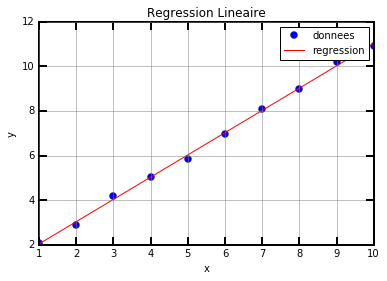

In [35]:
plt.plot(x, y, "bo", label="donnees") # les points (x, y) representes par des points
plt.plot( # droite de regression
    [x[0], x[-1]],                  # valeurs de x
    [a * x[0] + b, a * x[-1] + b],  # valeurs de y
    "r-",                           # couleur rouge avec un trait continu
    label="regression")             # legende
plt.xlabel("x") # nom de l'axe x
plt.ylabel("y") # nom de l'axe y
plt.legend() # la legende
plt.title("Regression Lineaire") # titre de graphique

## Pour aller plus loin : les résidus

Nous allons maintenant utiliser les méthodes vues précédemment sur un échantillon plus large. De plus, nous représenterons les résidus qui correspondent à la différence entre les points issus des données et la droite obtenue par la régression linéaire.

Commençons par lire les données dans le fichier ``regLinData.dat``

In [37]:
x, y = np.loadtxt("data/regLinData.dat", unpack=True)

Utilisons maintenant la fonction ``linregress`` pour trouver les paramètres de la régression linéaire :

In [38]:
a, b, r, p_vall, std_err = linregress(x, y)
print("a = ", a, " b = ", b, " r^2 = ", r**2)

a =  2.8778150933  b =  1.06938428687  r^2 =  0.991859700018


Nous allons maintenant visualiser les points et la droite de régression dans un premier graphique, puis, les résidus dans un second graphique. Pour ce faire, nous utiliserons la méthode ``subplot`` de ``matplotlib`` qui place des graphiques sur une grille. Les trois arguments de ``subplot`` sont le nombre de lignes, le nombre de colonnes et le numéro du graphique.

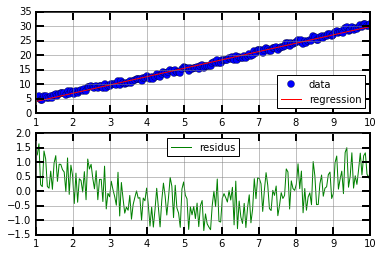

In [39]:
# graphique 1: les données et la droite de régression
plt.subplot(2, 1, 1)
plt.plot(x, y, "bo", label="data")
plt.plot(x, a * x + b, "r-", label="regression")
plt.legend(loc="lower right")
# graphique 2: les résidus
plt.subplot(2, 1, 2)
plt.plot(x, y - (a * x + b), "g-", label="residus")
plt.legend(loc="upper center")

Les résidus sont un bon indicateur de la qualité du modèle. Ici, on dit que les résidus sont 'structurés'. Ils ne sont pas aléatoirement répartis autour de zéro, ils présentent une variation parabolique. Cette structure des résidus indique qu'une fonction affine n'est pas adaptée pour représenter les données.

Utilisons la méthode ``polyfit`` pour ajuster une parabolle :

In [40]:
p0, p1, p2 = np.polyfit(x, y, 2)
print("p0 = ", p0, " p1 = ", p1, " p2 = ", p2)

p0 =  0.075725341459  p1 =  2.04483633725  p2 =  2.8437926618


Reprennons les lignes précédentes pour représenter les données graphiquement.

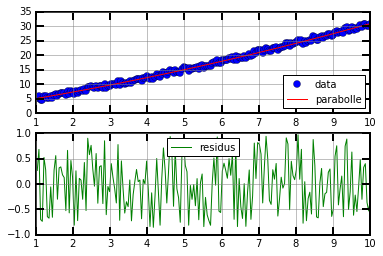

In [41]:
# graphique 1: les données et la droite de régression
plt.subplot(2, 1, 1)
plt.plot(x, y, "bo", label="data")
plt.plot(x, p0*x**2 + p1*x + p2, "r-", label="parabolle")
plt.legend(loc="lower right")
# graphique 2: les résidus
plt.subplot(2, 1, 2)
plt.plot(x, y - (p0*x**2 + p1*x + p2), "g-", label="residus")
plt.legend(loc="upper center")

Cette fois, les résidus sont bien répartis aléatoirement autour de l'origine. Calculons le coefficient de détermination selon
\begin{equation}
    R^2 = \frac{\sum_k (y^{calc}_k - \overline{y})^2}{\sum_k (y_k - \overline{y})^2}
\end{equation}
où les $y_k$ sont les données, les $y^{calc}$ sont ceux calculés avec le polynômes et $\overline{y}$ est la moyenne des valeurs $y_k$.

In [42]:
R2 = ((p0*x**2 + p1*x + p2 - y.mean())**2).sum() / ((y - y.mean())**2).sum()
print(R2)

0.995605211387


Comme attendu le coefficient de détermination est meilleur que celui obtenu pour la droite (0.9916). Pour information, la fonction utilisée pour produire les données du fichier ``regLinData.dat`` est :
\begin{equation}
    f(x) = 0.08 x^2 + 2x + 3 + \hat{g}(X)
\end{equation}
où $\hat{g}(X)$ est un bruit gaussien obtenu par le tirage de nombres aléatoires dans une distribution gaussienne centrée en zéro et de largeur 2.

## Conclusion

Ce TP est terminé. D'un point de vue théorique il permet de découvrir ou réviser la regression linéaire. D'un point de vue pratique, il vous a permis de mettre en pratique la syntaxe du langage python et d'utiliser des modules tels que ``numpy``, ``scipy`` ou ``matplotlib``.